# Week 2: (possible) solutions

In [1]:
import pandas as pd
import numpy as np

## 2) load the data

In [2]:
#load the training data
training = pd.read_csv('adni_adas13_train.csv', index_col=0)
training.head()

,ADAS13,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
12445,11,75.2,0.024937,0.003697,0.001676,0.012918,1,1.267128,1.129134
12541,17,61.9,0.015415,0.004701,0.001899,0.012774,2,0.734814,1.353690
8174,15,69.1,0.018987,0.003528,0.002021,0.012914,2,1.272141,1.335521
11928,27,76.0,0.013188,0.004726,0.002964,0.014040,1,1.224176,1.365338
10642,16,64.2,0.017397,0.005208,0.002557,0.014133,0,1.287984,0.956359


In [3]:
training.describe()

,ADAS13,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
count,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,15.50000,71.388889,0.024268,0.004634,0.002394,0.012155,0.511111,1.248531,1.214090
std,6.75716,7.479625,0.012270,0.000792,0.000447,0.001530,0.638512,0.140370,0.223049
min,3.00000,55.000000,0.005655,0.002788,0.001061,0.008111,0.000000,0.734814,0.838537
25%,10.75000,65.700000,0.014136,0.004119,0.002085,0.011178,0.000000,1.157186,1.020980
50%,14.50000,71.950000,0.021688,0.004624,0.002432,0.012132,0.000000,1.249185,1.164001
75%,19.00000,76.725000,0.030556,0.005210,0.002674,0.012998,1.000000,1.332481,1.411758
max,38.00000,88.600000,0.063894,0.006705,0.003759,0.017320,2.000000,1.701126,1.845984


## 3) Split the data into X and Y

In [4]:
Y_train = training.ADAS13
X_train = training.loc[:,"AGE":"AV45"]

## 4) Scale the features using the StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
#this estimates now mean and SD for each column of X_train
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_scaled = scaler.transform(X_train)

In [8]:
#check if it worked
pd.DataFrame(X_scaled).describe()
#all means are close to 0 and all std is close to 1. we are good to progress

,0,1,2,3,4,5,6,7
count,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02
mean,3.947460e-16,-9.621933e-17,-7.691378e-16,6.661338e-16,2.679338e-15,8.511710e-17,-5.427757e-17,1.120092e-15
std,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00
min,-2.197250e+00,-1.521167e+00,-2.337437e+00,-2.986681e+00,-2.649747e+00,-8.027055e-01,-3.669936e+00,-1.688420e+00
25%,-7.627063e-01,-8.280482e-01,-6.513700e-01,-6.926481e-01,-6.404242e-01,-8.027055e-01,-6.525596e-01,-8.681903e-01
50%,7.522787e-02,-2.108656e-01,-1.198528e-02,8.421886e-02,-1.544132e-02,-8.027055e-01,4.667514e-03,-2.251914e-01
75%,7.154096e-01,5.138831e-01,7.303251e-01,6.269722e-01,5.522323e-01,7.678053e-01,5.997252e-01,8.886832e-01
max,2.307485e+00,3.238465e+00,2.622680e+00,3.058276e+00,3.384363e+00,2.338316e+00,3.233287e+00,2.840883e+00


In [9]:
#as we noticed, X_scaled is no longer a dataframe and we've lost the column names (names of the features), let's put that back
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X_train.columns

In [10]:
X_scaled.describe()

,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
count,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02
mean,3.947460e-16,-9.621933e-17,-7.691378e-16,6.661338e-16,2.679338e-15,8.511710e-17,-5.427757e-17,1.120092e-15
std,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00
min,-2.197250e+00,-1.521167e+00,-2.337437e+00,-2.986681e+00,-2.649747e+00,-8.027055e-01,-3.669936e+00,-1.688420e+00
25%,-7.627063e-01,-8.280482e-01,-6.513700e-01,-6.926481e-01,-6.404242e-01,-8.027055e-01,-6.525596e-01,-8.681903e-01
50%,7.522787e-02,-2.108656e-01,-1.198528e-02,8.421886e-02,-1.544132e-02,-8.027055e-01,4.667514e-03,-2.251914e-01
75%,7.154096e-01,5.138831e-01,7.303251e-01,6.269722e-01,5.522323e-01,7.678053e-01,5.997252e-01,8.886832e-01
max,2.307485e+00,3.238465e+00,2.622680e+00,3.058276e+00,3.384363e+00,2.338316e+00,3.233287e+00,2.840883e+00


## 5) Train a linear regression model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_mod = LinearRegression()

In [13]:
#this trains the linear model
lin_mod.fit(X_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's inspect the coefficients - the first one is the intercept $\beta_1$ the following ones are $\beta_2, \dots, \beta_8$, there are no names, but the coefficients are the same as in the input order (Age, ..., AV45).

In [14]:
lin_mod.coef_

array([ 0.33286289,  0.67184723, -0.96767835, -1.07218495, -0.10925061,
        0.73339078, -1.59366451,  1.2142151 ])

To get the intercept ($\beta_0$) we use:

In [15]:
lin_mod.intercept_

15.499999999999998

## Apply the model to the test data

In [16]:
#load the test data
testing = pd.read_csv('adni_adas13_test.csv', index_col=0)

In [17]:
testing.head()

,ADAS13,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
7144,6,62.9,0.011369,0.005746,0.002457,0.012014,1,1.312115,1.147285
7154,7,69.9,0.025968,0.004625,0.002682,0.014716,0,1.455720,1.053793
7165,6,66.0,0.011164,0.005347,0.002483,0.011678,1,1.203127,1.313591
7183,6,61.9,0.011530,0.005543,0.002834,0.014100,0,1.408065,1.029976
7190,10,72.5,0.038966,0.004788,0.002424,0.012447,0,1.340443,0.993989


In [18]:
testing.describe()

,ADAS13,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,13.305556,70.792222,0.022829,0.004776,0.002455,0.012227,0.638889,1.278526,1.221457
std,5.858763,6.975507,0.012595,0.000788,0.000460,0.001404,0.699272,0.128293,0.225682
min,3.000000,55.000000,0.004626,0.002664,0.001020,0.007741,0.000000,0.914992,0.899074
25%,9.000000,66.400000,0.013185,0.004196,0.002212,0.011381,0.000000,1.199721,1.036656
50%,12.000000,70.950000,0.019806,0.004744,0.002441,0.012207,1.000000,1.287620,1.168124
75%,17.000000,75.400000,0.029391,0.005368,0.002699,0.013136,1.000000,1.362232,1.381668
max,31.000000,88.300000,0.068601,0.006802,0.003738,0.015922,2.000000,1.661761,1.856981


In [19]:
#the data is not normalize/scaled so our predictions will be wrong since they expect scaled data!
#apply the scaler trained on the training data and transform your test data.
Y_test = testing.ADAS13
X_test = testing.loc[:,"AGE":"AV45"]
X_test_scaled = scaler.transform(X_test)

In [20]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns

In [21]:
X_test_scaled.describe()

,AGE,Ventricles,Hippocampus,Entorhinal,Fusiform,APOE4,FDG,AV45
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-0.079995,-0.117600,0.180137,0.137785,0.047262,0.200676,0.214283,0.033119
std,0.935203,1.029361,0.998122,1.031240,0.919751,1.098215,0.916512,1.014625
min,-2.197250,-1.605296,-2.494553,-3.078439,-2.892551,-0.802706,-2.382767,-1.416257
25%,-0.668858,-0.905799,-0.554262,-0.407971,-0.507361,-0.802706,-0.348694,-0.797711
50%,-0.058842,-0.364680,0.140301,0.104520,0.033748,0.767805,0.279245,-0.206656
75%,0.537768,0.418694,0.930528,0.682521,0.642927,0.767805,0.812267,0.753401
max,2.267264,3.623188,2.745732,3.011423,2.468395,2.338316,2.952067,2.890326


In [22]:
#now we can make predictions
Y_pred = lin_mod.predict(X_test_scaled)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

25.925839734240466

In [24]:
#we can compute the corrcoef using numpy
np.corrcoef(Y_test, Y_pred)

array([[1.        , 0.58298928],
       [0.58298928, 1.        ]])

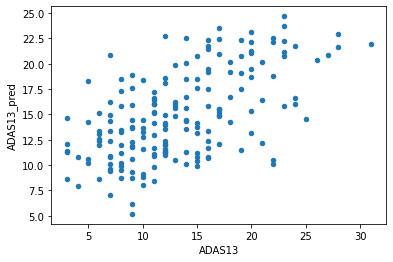

In [41]:
#and make a simple scatter plot
pd.DataFrame({"ADAS13": Y_test, "ADAS13_pred": Y_pred }).plot.scatter(x="ADAS13", y="ADAS13_pred")

## 6) Using Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
#run the rigde regression for 3 values of alpha: 10000, 100, 1
my_alphas = [10000, 100, 1]
for my_alpha in my_alphas:
    my_ridge = Ridge(alpha=my_alpha)
    #fit the model
    my_ridge.fit(X_scaled, Y_train)
    #print coefficients
    print(my_ridge.coef_)
    #make predictions
    Y_tmp = my_ridge.predict(X_test_scaled)
    #print (MSE)
    mse = mean_squared_error(Y_test, Y_tmp)
    print("MSE: " + str(mse))
    # print corrcoef
    corr = np.corrcoef(Y_test, Y_tmp)[0,1]
    print("r: " + str(corr))

[ 0.0280528   0.03629892 -0.04955003 -0.04444916 -0.03663809  0.02370707
 -0.05325287  0.04632317]
MSE: 37.50050194542234
r: 0.5785699989031818
[ 0.33950128  0.55787272 -0.82535771 -0.80878433 -0.34754236  0.57335843
 -1.15284754  0.94729128]
MSE: 25.455623588440208
r: 0.5846322703047457
[ 0.33315145  0.67009873 -0.96657217 -1.0675581  -0.11488926  0.73152346
 -1.58673072  1.21061016]
MSE: 25.910773233666518
r: 0.5830510769611772


Strong regularization ($\alpha$=10000) gave the highest error MSE=37. Model paramebters were all smallish (absolute values < 0.06). With relaxed regularization ($\alpha$=100) the $\beta$ coefficients grew, the MSE decreased, but correlation actually stayed quite similar. With even less regularization ($\alpha$=1) the model got a bit worse again, but not much compared to the $\alpha$=100.

## 7) Challenge: Run with a detailed list of alphas

In [28]:
#when setting up our ridge object, we have to specify our regularization parameter.
my_alphas=np.power(10, np.arange(0,5, 0.25))
MSEs = []
corrs = []
my_betas = []
for my_alpha in my_alphas:
    my_ridge = Ridge(alpha=my_alpha)
    #fit the model
    my_ridge.fit(X_scaled, Y_train)
    #print coefficients
    my_betas.append(my_ridge.coef_)
    #make predictions
    Y_tmp = my_ridge.predict(X_test_scaled)
    #MSE
    mse = mean_squared_error(Y_test, Y_tmp)
    MSEs.append(mse)
    #r
    corr = np.corrcoef(Y_test, Y_tmp)[0,1]
    corrs.append(corr)

### Visualize the Performance as MSE and correlation

In [29]:
results = pd.DataFrame({"alpha" : my_alphas, "MSE": MSEs, "R": corrs})

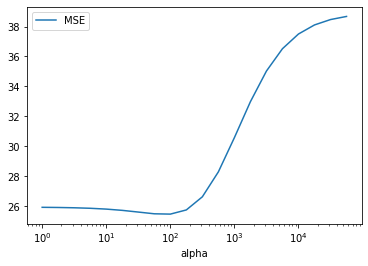

In [30]:
results.plot(x='alpha', y='MSE', logx=True)

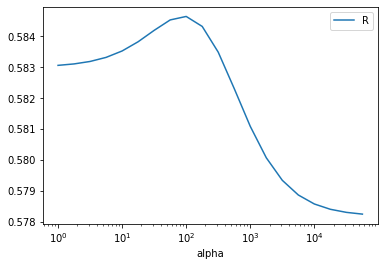

In [31]:
results.plot(x='alpha', y='R', logx=True)

### Visualize the change of the $\beta$ coefficients

In [32]:
betas = pd.DataFrame( my_betas)
betas.columns = X_scaled.columns

In [33]:
betas = pd.concat([pd.Series(my_alphas), betas], axis=1)
betas.rename(columns={0 : 'alpha'}, inplace=True)

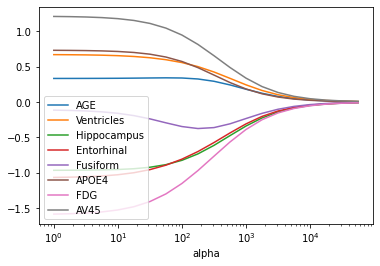

In [34]:
betas.plot(x='alpha', y=X_scaled.columns, logx=True)

## FYI: By contrast: LASSO regression

In [35]:
from sklearn.linear_model import Lasso
#when setting up our ridge object, we have to specify our regularization parameter.
my_alphas=np.power(10, np.arange(-1,0.6, 0.1))
MSEs = []
corrs = []
my_betas = []
for my_alpha in my_alphas:
    my_lasso = Lasso(alpha=my_alpha)
    #fit the model
    my_lasso.fit(X_scaled, Y_train)
    #print coefficients
    my_betas.append(my_lasso.coef_)
    #make predictions
    Y_tmp = my_lasso.predict(X_test_scaled)
    #MSE
    mse = mean_squared_error(Y_test, Y_tmp)
    MSEs.append(mse)
    #r
    corr = np.corrcoef(Y_test, Y_tmp)[0,1]
    corrs.append(corr)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [36]:
results_lasso = pd.DataFrame({"alpha" : my_alphas, "MSE": MSEs, "R": corrs})

In [37]:
results_lasso

,alpha,MSE,R
0,0.100000,25.603600,0.583455
1,0.125893,25.533901,0.583548
2,0.158489,25.454180,0.583646
3,0.199526,25.366539,0.583738
4,0.251189,25.276366,0.583795
5,0.316228,25.194807,0.583758
6,0.398107,25.142699,0.583503
7,0.501187,25.144847,0.583098
8,0.630957,25.169324,0.584717
9,0.794328,25.382356,0.586756


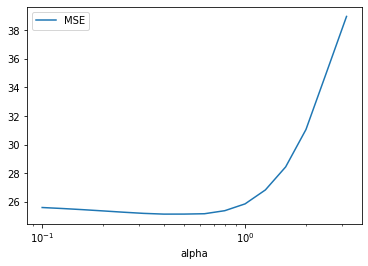

In [38]:
results_lasso.plot(x='alpha', y='MSE', logx=True)

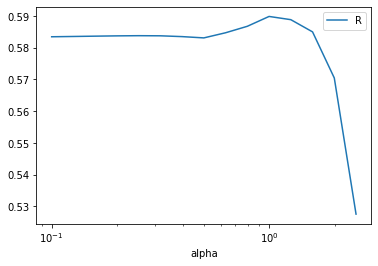

In [39]:
results_lasso.plot(x='alpha', y='R', logx=True)

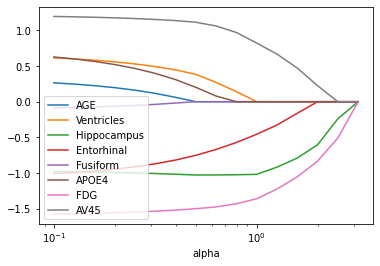

In [40]:
betas_lasso = pd.DataFrame( my_betas)
betas_lasso.columns = X_scaled.columns
betas_lasso = pd.concat([pd.Series(my_alphas), betas_lasso], axis=1)
betas_lasso.rename(columns={0 : 'alpha'}, inplace=True)
betas_lasso.plot(x='alpha', y=X_scaled.columns, logx=True)

Compared to Ridge regression, the effect of feature selection is clearly visible. For large values of $\alpha$, i.e, strong regularization, many features receive coefficients equal to 0.